In [3]:
import sys 
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt

sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")

from src.features_calculator import (
    new_concatenate_features,
    get_augmentation_pars,
    create_interpolater
)
from training.helper import get_augmentation_options

import numpy as np
from training.video_loader import video_loader
from src.helper import OfParams, AugParams

of_params = OfParams()
aug_params = AugParams()

clip_name = "1322-2023-02-03-14-25-41-7883a14f"

of_params = OfParams(n_layers=3, layer_interval=7, average=False, img_shape=(64, 64), grid_size=15, step_size=5, window_size=11, stop_steps=3)

rec = video_loader(of_params, aug_params)

rec._of_params.grid_size = 4
rec._of_params.n_layers = 7

feature_array, all_timestamps, clip_transitions = rec._load_features(
            clip_name, rec._of_params)

n_clips = clip_transitions.shape[0] + 1
clip_feature_array = np.split(feature_array, clip_transitions + 1, axis=0)
clip_timestamps = np.split(all_timestamps, clip_transitions + 1, axis=0)

Number of clips: 2


options 24
0.5005
5.004627


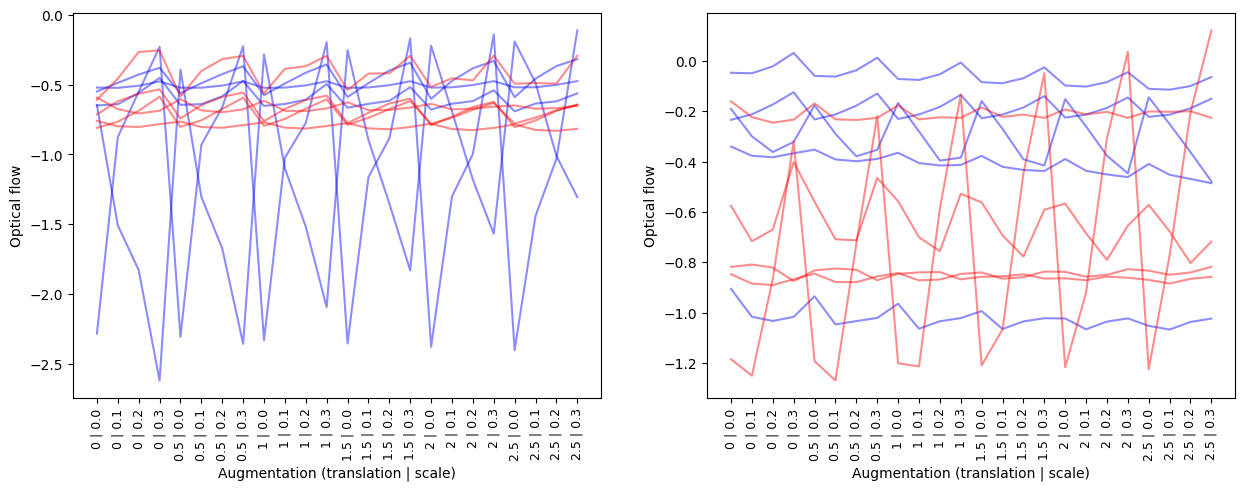

In [139]:

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

iclip = 1


all_times = (clip_timestamps[iclip] - clip_timestamps[iclip][0]) / 1e9 
indc_times = [all_times[100], all_times[1000]]

aug_params_options = get_augmentation_options()
aug_options = aug_params_options[0]
aug_params = get_augmentation_pars(aug_options)

interp_left, interp_right = create_interpolater(clip_feature_array[iclip][:, :, 1], all_times)
n_clip_frames = clip_feature_array[iclip].shape[0]

for ii, times in enumerate(indc_times):

    print(times)

    vec = np.zeros([224, 24])

    aug_params = {}

    aug_params["speed"] = 1
    aug_params["translation"] = np.zeros((1, 2))
    aug_params["scale"] = 1
    aug_params["linear_distort"] = np.eye(2)

    aug_feat = new_concatenate_features(
        interp_left,
        interp_right,
        n_clip_frames,
        of_params,
        times,
        aug_params,
    )

    vec[:, 0] = aug_feat

    for i, all_aug_params in enumerate(aug_params_options):

        aug_params["speed"] = 1
        aug_params["translation"] = [0, all_aug_params.std_translation]
        aug_params["scale"] = 1 + all_aug_params.std_scale
        aug_params["linear_distort"] = np.eye(2) + [[0, 0], [0, 0]]

        aug_feat = new_concatenate_features(
            interp_left,
            interp_right,
            n_clip_frames,
            of_params,
            times,
            aug_params,
        )
        
        vec[:, i] = aug_feat

    ax[ii].plot(vec[list(range(0, 5)), :].transpose(), c="b", alpha=0.45)
    ax[ii].plot(vec[list(range(112,117)), :].transpose(), c="r", alpha=0.45)
    ax[ii].set_ylabel("Optical flow")
    ax[ii].set_xlabel("Augmentation (translation | scale)")
    ax[ii].set_xticks(range(len(aug_params_options)), [str(aug_params.std_translation) + " | " + str(aug_params.std_scale) for aug_params in aug_params_options], rotation=90, fontsize=9)



**Plot feature vector as function of augmentation**

options 24
0.5005
5.004627


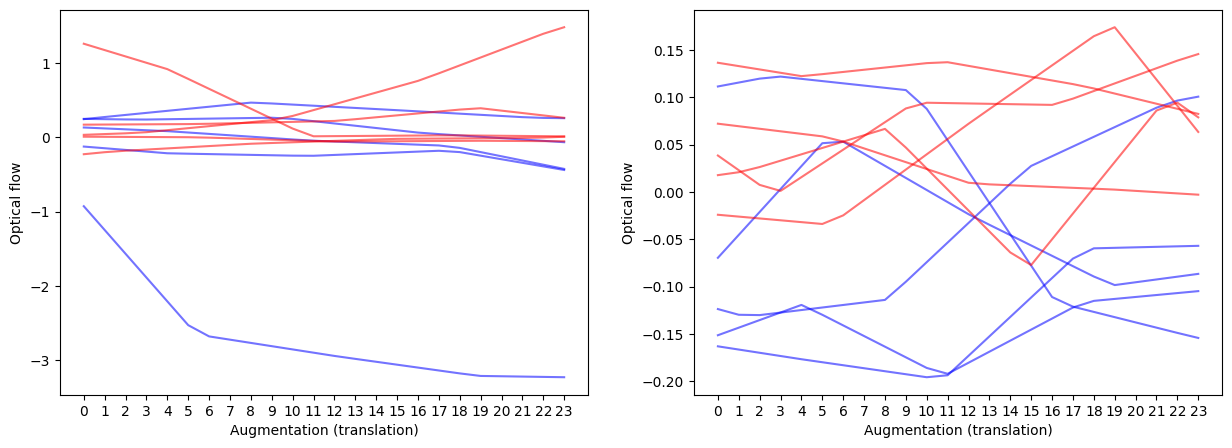

In [138]:

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

all_times = (clip_timestamps[iclip] - clip_timestamps[iclip][0]) / 1e9 
indc_times = [all_times[100], all_times[1000]]
iclip = 1

aug_params_options = get_augmentation_options()
aug_options = aug_params_options[0]
aug_params = get_augmentation_pars(aug_options)

interp_left, interp_right = create_interpolater(clip_feature_array[iclip][:, :, 1], all_times)
n_clip_frames = clip_feature_array[iclip].shape[0]

for ii, times in enumerate(indc_times):

    print(times)

    vec = np.zeros([224, 24])

    aug_params = {}

    aug_params["speed"] = 1
    aug_params["translation"] = np.zeros((1, 2))
    aug_params["scale"] = 1
    aug_params["linear_distort"] = np.eye(2)

    aug_feat = new_concatenate_features(
        interp_left,
        interp_right,
        n_clip_frames,
        of_params,
        times,
        aug_params,
    )

    vec[:, 0] = aug_feat

    for i, all_aug_params in enumerate(aug_params_options):

        aug_params["speed"] = 1
        aug_params["translation"] = [0, i/2]
        aug_params["scale"] = 1 #+ all_aug_params.std_scale
        aug_params["linear_distort"] = np.eye(2) + [[0, 0], [0, 0]]

        aug_feat = new_concatenate_features(
            interp_left,
            interp_right,
            n_clip_frames,
            of_params,
            times,
            aug_params,
        )
        
        vec[:, i] = aug_feat

    ax[ii].plot(vec[list(range(50, 55)), :].transpose(), c="b", alpha=0.55)
    ax[ii].plot(vec[list(range(152,157)), :].transpose(), c="r", alpha=0.55)
    ax[ii].set_ylabel("Optical flow")
    ax[ii].set_xlabel("Augmentation (translation)")
    ax[ii].set_xticks(range(len(aug_params_options)), rotation=90, fontsize=9)



In [66]:
vec[9, :]

array([0.055207  , 0.05293916, 0.05186293, 0.0519783 , 0.05238151,
       0.0496482 , 0.04810649, 0.04775639, 0.04955602, 0.04635723,
       0.04435006, 0.04353449, 0.04827599, 0.04306627, 0.04059362,
       0.03931258, 0.05051321, 0.03992403, 0.03683718, 0.03509067,
       0.05275044, 0.04252011, 0.03308075, 0.03086876])

In [23]:
aug_feat = new_concatenate_features(
        interp_left,
        interp_right,
        n_clip_frames,
        of_params,
        1000,
        aug_params,
    )

In [123]:
all_times

array([0.0000000e+00, 5.0000000e-03, 1.0000000e-02, ..., 1.4658506e+01,
       1.4663506e+01, 1.4668506e+01])

In [90]:
clip_timestamps[1].shape

(2932,)

In [119]:
.shape

(2932,)

In [4]:

OfParams(5, 7, False, (64, 64), 4, 7, 15, 3)



ModuleNotFoundError: No module named 'src'